In [ ]:
!pip install mlxtend
!pip install scikit-plot

In [2]:
import mlxtend, scikitplot
import numpy as np

In [21]:
p_pred = np.array([[ 0.8,  0.2],
                   [ 0.6,  0.4],
                   [ 0.2,  0.8],
                   [ 0.3,  0.7],
                   [ 0.4,  0.6]])

y_real = np.array([0, 0, 1, 1, 1])

<AxesSubplot:title={'center':'Lift Curve'}, xlabel='Percentage of sample', ylabel='Lift'>

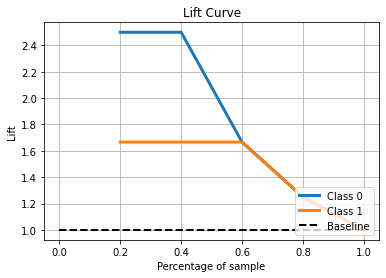

In [22]:
scikitplot.metrics.plot_lift_curve(y_real, p_pred)

In [ ]:
2.5, 1.3, 1.7, 1.3, 

In [17]:
y_pred = (p_pred[:,1] > 0.5).astype(int)

In [18]:
y_pred

array([0, 0, 1, 1, 1])

In [23]:
tp = (y_real * y_pred).sum()
fp = y_pred.sum() - tp
tn = ((1 - y_real) * (1 - y_pred)).sum()
fn = (1 - y_pred).sum() - tn
accuracy = ((tp + fn)/ (tp + tn + fp + fn)) #общая точность
precision = tp / (tp + fp) #точность определения таргета 1

In [27]:
lift = (tp/(tp+fp)) / ((tp + fn)/ (tp + tn + fp + fn))

In [26]:
from mlxtend.evaluate import lift_score

In [29]:
p_pred = np.array([[ 0.8,  0.2],
                   [ 0.6,  0.4],
                   [ 0.5,  0.5],
                   [ 0.3,  0.7],
                   [ 0.2,  0.8]])

y_pred = (p_pred[:,1] > 0.5).astype(int)
y_real = np.array([0, 0, 1, 1, 1])

In [48]:
import pandas as pd

In [62]:
lift_score(y_real[0:], p_pred[0:])

/Users/stihin/opt/anaconda3/lib/python3.8/site-packages/mlxtend/evaluate/lift_score.py:72: RuntimeWarning: invalid value encountered in double_scalars
  return (support(targ_tmp, pred_tmp) /


nan

In [76]:
y_real = np.array([  1,   1,   0,   0,   0,    1,   0,    1,   0,    1])
p_pred = np.array([0.8, 0.8, 0.2, 0.2, 0.6, 0.41, 0.6, 0.61, 0.4, 0.61])

In [77]:
sort_y_by_pred = np.array([x for _, x in sorted(zip(p_pred, y_real))])
print(sort_y_by_pred)

[0 0 0 1 0 0 1 1 1 1]


In [78]:
sort_y_by_pred = np.array([x for _, x in sorted(zip(p_pred, y_real))])
ratio_of_all = sort_y_by_pred.mean()
np.array([sort_y_by_pred[-i:].mean() / ratio_of_all for i in range(1, len(sort_y_by_pred)+1)])

array([2.        , 2.        , 2.        , 2.        , 1.6       ,
       1.33333333, 1.42857143, 1.25      , 1.11111111, 1.        ])

In [79]:
def lift_curve(y_val, y_pred, step=0.01):
    aux_lift = pd.DataFrame()
    #Create a real and predicted column for our new DataFrame and assign values
    aux_lift['real'] = y_val
    aux_lift['predicted'] = y_pred
    #Order the values for the predicted probability column:
    aux_lift.sort_values('predicted',ascending=False,inplace=True)

    #Create the values that will go into the X axis of our plot
    x_val = np.arange(step,1+step,step)
    #Calculate the ratio of ones in our data
    ratio_ones = aux_lift['real'].sum() / len(aux_lift)
    #Create an empty vector with the values that will go on the Y axis our our plot
    y_v = []

    #Calculate for each x value its correspondent y value
    for x in x_val:
        num_data = int(np.ceil(x*len(aux_lift))) #The ceil function returns the closest integer bigger than our number 
        data_here = aux_lift.iloc[:num_data,:]   # ie. np.ceil(1.4) = 2
        ratio_ones_here = data_here['real'].sum()/len(data_here)
        y_v.append(ratio_ones_here / ratio_ones)
    return y_v

In [80]:
lift_curve(y_real, p_pred)

[2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 1.6,
 1.6,
 1.6,
 1.6,
 1.6,
 1.6,
 1.6,
 1.6,
 1.6,
 1.6,
 1.3333333333333333,
 1.3333333333333333,
 1.3333333333333333,
 1.3333333333333333,
 1.3333333333333333,
 1.3333333333333333,
 1.3333333333333333,
 1.3333333333333333,
 1.3333333333333333,
 1.3333333333333333,
 1.4285714285714286,
 1.4285714285714286,
 1.4285714285714286,
 1.4285714285714286,
 1.4285714285714286,
 1.4285714285714286,
 1.4285714285714286,
 1.4285714285714286,
 1.4285714285714286,
 1.25,
 1.25,
 1.25,
 1.25,
 1.25,
 1.25,
 1.25,
 1.25,
 1.25,
 1.25,
 1.25,
 1.1111111111111112,
 1.1111111111111112,
 1.1111111111111112,
 1.1111111111111112,
 1.1111111111111112,
 1.1111111111111112,
 1.1111111111111112,
 1.1111111111111112,
 1.1111111111111112,
 1.1111111111111112,
 1.0,
 1.0,
 1